In [1]:
!nvidia-smi

Tue May 11 05:21:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload() #upload kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
import time
time.sleep(5)
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d noulam/tomato
!unzip -q /content/tomato.zip

Saving kaggle.json to kaggle.json
kaggle.json
 98% 729M/743M [00:08<00:00, 61.9MB/s]
100% 743M/743M [00:08<00:00, 96.7MB/s]


In [18]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'categorical')

test_set = valid_set[-1]

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [16]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (11,11),padding = 'Same', 
                 activation ='relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048, activation = "relu"))
model.add(Dropout(0.35))
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.35))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = "Adam" , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 8)       2912      
_________________________________________________________________
batch_normalization_9 (Batch (None, 256, 256, 8)       32        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 16)      3216      
_________________________________________________________________
batch_normalization_10 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 16)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1147/1147 [==============================] - 274s 238ms/step - loss: 4.3513 - accuracy: 0.3835 - val_loss: 2.4287 - val_accuracy: 0.3821
Epoch 2/25
1147/1147 [==============================] - 273s 238ms/step - loss: 1.1544 - accuracy: 0.6190 - val_loss: 4.0527 - val_accuracy: 0.3882
Epoch 3/25
1147/1147 [==============================] - 273s 238ms/step - loss: 0.8923 - accuracy: 0.7145 - val_loss: 0.9374 - val_accuracy: 0.6761
Epoch 4/25
1147/1147 [==============================] - 272s 237ms/step - loss: 0.7786 - accuracy: 0.7566 - val_loss: 2.1613 - val_accuracy: 0.5444
Epoch 5/25
1147/1147 [==============================] - 273s 238ms/step - loss: 0.7014 - accuracy: 0.7786 - val_loss: 1.0605 - val_accuracy: 0.6731
Epoch 6/25
1147/1147 [==============================] - 273s 238ms/step - loss: 0.6345 - accuracy: 0.8071 - val_loss: 12.9099 - val_accuracy: 0.2297
Epoch 7/25
1147/1147 [==============================] - 273s 238ms/step - loss: 0.5695 - accuracy: 0.8190 - val

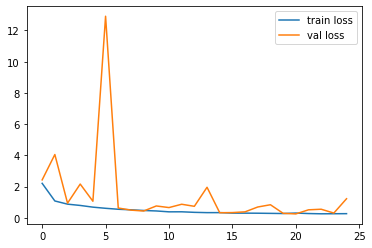

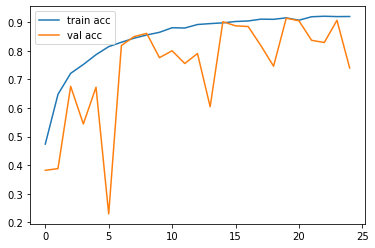

<Figure size 432x288 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/MyDrive/Tomato_Basic_CNN.h5')

In [20]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(test_set[0])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_set[1],axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

ValueError: ignored